In [2]:
%matplotlib inline


# Comparison of F-test and mutual information


这个例子展示了F-test与互信息之间的差异。

我们准备了三个在[0,1]之间均匀分布的随机特征，其关系如下

y = x_1 + sin(6 * pi * x_2) + 0.1 * N(0, 1),第三个变量并没有什么用。
下面的代码绘制了y对单个x_i的依赖关系以及单变量F检验统计和互信息的标准化值。

由于F-test仅捕获线性相关性，因此将x_1视为最具辨别力的特征。 而互信息可以捕获变量之间的任何类型的依赖性，并且它将x_2评为最具辨别力的特征，具体效果如下。 这两种方法都正确地将x_3正确的标记为无关紧要的特征。

Automatically created module for IPython interactive environment


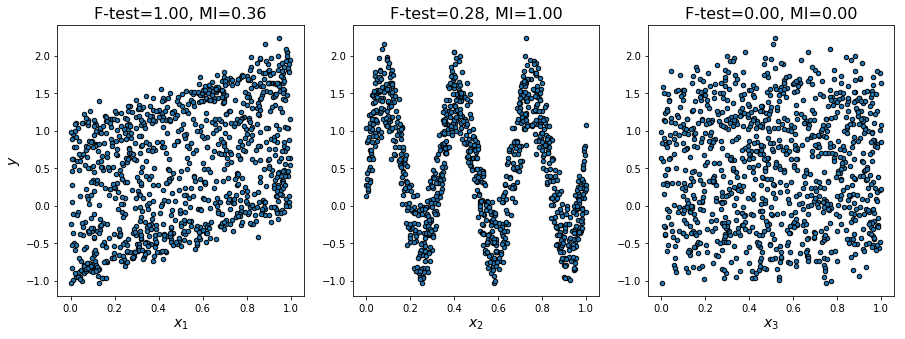

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()